# Problem Set - Gaussian Processes 

In [1]:
# The modules we will be using in this problem set
import util, test # These are local modules please feel free to read through them
from importlib import reload
reload(util)
reload(test)
import numpy as np
import matplotlib.pyplot as plt

## Gaussian Processes##

In this problem set, you will gain a deeper understanding of how gaussian processes work by working on building a small library for guassian regression and classification. If you are having serious problems with this Pset please feel free to ask on Piazza or refer to [Gaussian Proccess: A Quick Introduction](A Quick Intro To Gaussian Proccesses.pdf).

### Problems
1. [Part 1 - Overveiw](#Part-1---Overveiw)
  1. [Problem 1 (10 pts)](#Problem-1---Making-a-Simple-Kernal-%2810-pts%29)
  2. [Problem 2 (5 pts)](#Problem-2---Making-a-Periodic-Kernal-%285-pts%29)
2. [Part 2 - Regression](#Part-2---Regression)
3. [Part 3 - Classification](#Part-3---Classification)

# Part 1 - Overveiw

Say something Here

## Problem 1 - Making a Simple Kernal (10 pts)

In [2]:
def kernal(x0, x1, params, sigma_n):
    diff = np.subtract.outer(x0, x1)
    value = params[0]**2 * np.exp( -0.5 * (1.0/params[1]**2) * diff**2)
    value[np.where(diff == 0.0)] += sigma_n
    return value

In [19]:
test.test_simple_kernal(kernal)

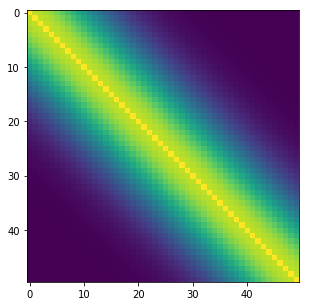

In [20]:
x = np.linspace(-5, 5, 50)
sigma_n = 0.1
params = [1, 2]
K = kernal(x, x, params, sigma_n)
util.visiualize_kernal(K)

## Problem 2 - Making a Periodic Kernal (5 pts)

In [21]:
def periodic_kernal(x0, x1, params, sigma_n):
    diff = np.subtract.outer(x0, x1)
    value = params[0]**2 * np.exp( -0.5 * (1.0/params[1]**2) * diff**2)
    value += params[2]**2 * np.exp(-2 * np.sin(params[3]*diff)**2)
    value[np.where(diff == 0.0)] += sigma_n**2
    return value

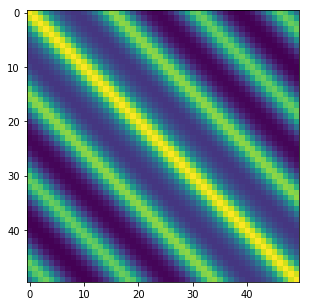

In [22]:
test.test_periodic_kernal(periodic_kernal)
x = np.linspace(-5, 5, 50)
sigma_n = 0.1
params = [1, 2, 2, 1]
K = periodic_kernal(x, x, params, sigma_n)
util.visiualize_kernal(K)

# Part 2 - Regression

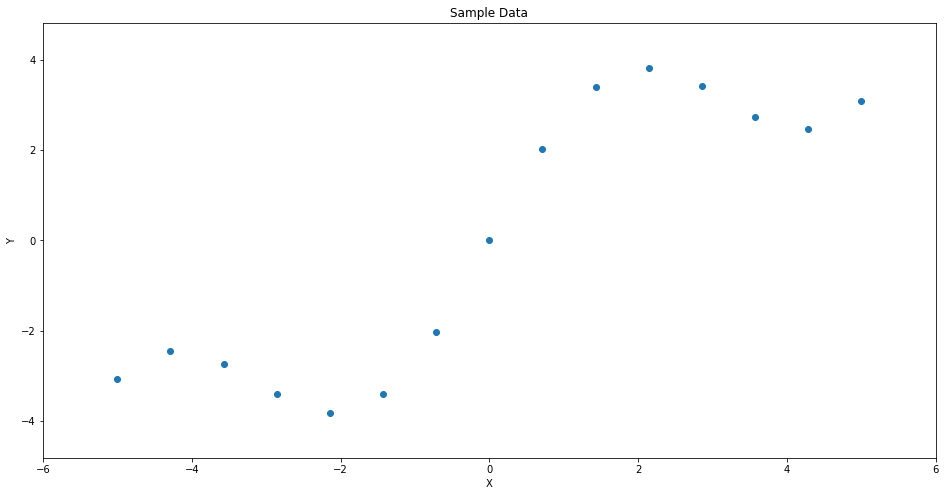

In [23]:
x, y = util.get_sample_data_1()
util.scatter_raw_data(x, y)

## Problem 3 - Getting K Matrix (5 pts)

In [24]:
def get_Ks(x_new, x, kernal, theta):
    K = kernal(x, x, theta[:-1], theta[-1]) # K
    KS = kernal(x_new, x, theta[:-1], theta[-1]) # K*
    KSS = kernal(x_new, x_new, theta[:-1], theta[-1]) # K**
    return K, KS, KSS

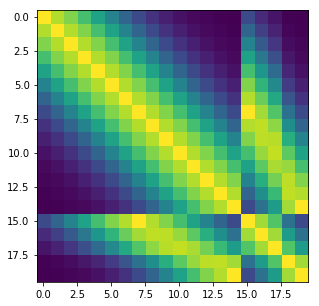

In [16]:
test.test_get_Ks(get_Ks, kernal)
theta = [1, 3, 0.1]
x_new = np.array([0, 1, 2, 4, 5])
K, KS, KSS = get_Ks(x_new, x, kernal, theta)
util.visiualize_Ks(K, KS, KSS)


## Problem 4 - Regression GP (20 pts)

In [10]:
def regression_GP(x_new, x, y, kernal, theta):
    K, KS, KSS = get_Ks(x_new, x, kernal, theta)

    y = np.matmul(np.matmul(KS, np.linalg.inv(K)),y)
    var = KSS - KS.dot(np.linalg.inv(K).dot(KS.T))
    var = np.diagonal(var)
    return(y.squeeze(), var.squeeze())

In [11]:
test.test_regression(regression_GP, kernal)

## Problem 5 - Manual Parameter Tuning (5 pts)

# Part 3 - Classification

## Problem 6 - Solve KP and W (5 pts)